In [1]:
import sys

%matplotlib inline

plt.rcParams['figure.dpi'] = 120
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 14
plt.rcParams["mathtext.fontset"] = "cm"

# How to use the photomeson models...

The models are implemented as classes in the main directory under **lib**...

In [2]:
sys.path.append('../')
from config import *
sys.path.append(global_path)
from photomeson_lib.photomeson_models import *

The class *GeneralPhotomesonModel* is a base class from which all the models are derived. The methods for providing the cross sections are defined there. Below are examples showing how to load the models, access the cross sections, etc.

Firstly, the convention used for particles' id:
### Particle ID convention:
- 2: pi plus
- 3: pi minus
- 4: pi zero
- 100\*A+Z: for nuclei, where Z and A are the proton and total nucleon numbers. For example
	- 100: neutron
	- 101: proton
	- ...
	- 1407: Nitrogen 14 (Z=7, A=14)
	- ... ect.


## Superposition Model:

The implementation of the Superposition Model commonly used...

In [3]:
spm = SuperpositionModel()

SuperpositionModel::__init__(): Using Superposition Model assumptions for the total cross section at low energies.
SuperpositionModel::__init__(): Custom function chosen for assymptotic scaling of total cross section.
SuperpositionModel::__init__(): Using Superposition Model assumptions for the inclusive cross sections of pions produced from nuclei.


... the total cross section can be obtained through the method cs_nonel, which returns the energy and the cross section values, and can be plotted directly.

Text(0,0.5,'$\\sigma$ [mb]')

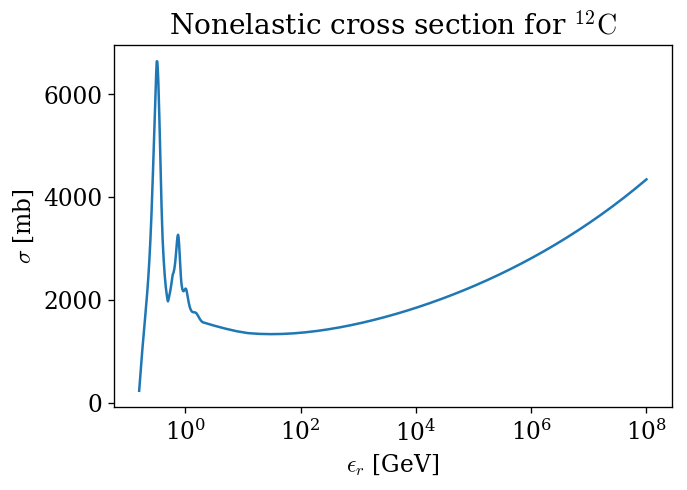

In [4]:
plt.semilogx(*spm.cs_nonel(1206))

plt.title(r'Nonelastic cross section for $\rm ^{12}C$')
plt.xlabel(r'$\epsilon_r$ [GeV]')
plt.ylabel(r'$\sigma$ [mb]')

The inclusive cross section works analogously, requiring an extra id for the particle product...

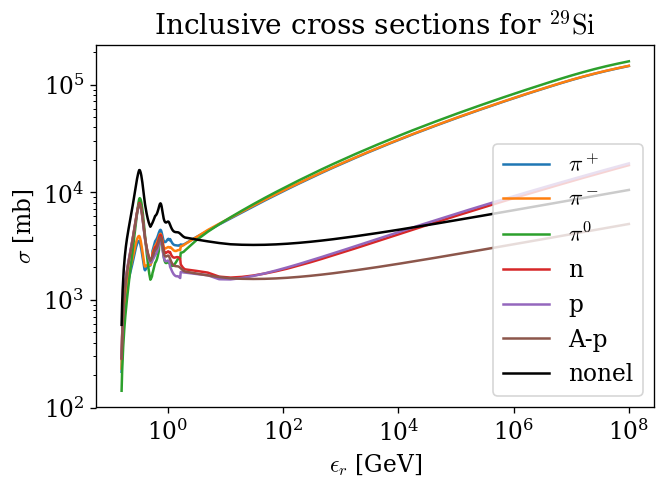

In [5]:
plt.loglog(*spm.cs_incl(2914, 2), label=r'$\pi^+$')
plt.loglog(*spm.cs_incl(2914, 3), label=r'$\pi^-$')
plt.loglog(*spm.cs_incl(2914, 4), label=r'$\pi^0$')

plt.loglog(*spm.cs_incl(2914, 100), label='n')
plt.loglog(*spm.cs_incl(2914, 101), label='p')
plt.loglog(*spm.cs_incl(2914, 2813), label='A-p')

plt.loglog(*spm.cs_nonel(2914), c='k', label='nonel')

plt.title(r'Inclusive cross sections for $\rm ^{29}Si$')
plt.xlabel(r'$\epsilon_r$ [GeV]')
plt.ylabel(r'$\sigma$ [mb]')
plt.legend()

... and it returns zero values for the cross sections which are not defined in the model:

In [6]:
_, cs = spm.cs_incl(2914, 402)
print 'All values are 0? ', np.all(cs == 0)

All values are 0?  True


## The new photomeson models:


### Empirical model: 
The class is named *EmpiricalModel* ...

### Residual Decay model: 
The class is named *ResidualDecayModel* ...

In [7]:
em = EmpiricalModel()

EmpiricalModel::__init__(): Using Universal-function is on.
EmpiricalModel::__init__(): Custom function chosen for assymptotic scaling of total cross section.
EmpiricalModel::__init__(): Using data-based-spline function for the inclusive cross sections of pions produced from nuclei.


In [8]:
rdm = ResidualDecayModel()

ResidualDecayModel::__init__(): Default function chosen for residual excitation energy.
ResidualDecayModel::__init__(): Using Universal-function is on.
ResidualDecayModel::__init__(): Custom function chosen for assymptotic scaling of total cross section.
ResidualDecayModel::__init__(): Using data-based-spline function for the inclusive cross sections of pions produced from nuclei.


The messages inform of the elements of the models.
The total cross section is the same in the EM and the RDM, but different from the Superposition Model:

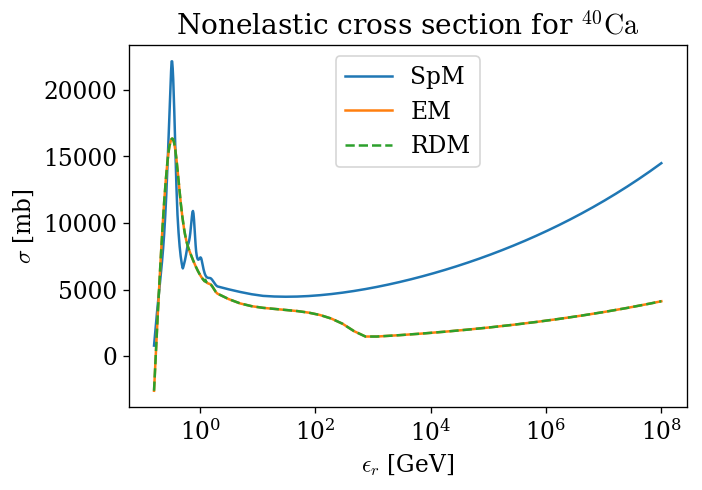

In [9]:
plt.semilogx(*spm.cs_nonel(4020), label='SpM')
plt.semilogx(*em.cs_nonel(4020), label='EM')
plt.semilogx(*rdm.cs_nonel(4020), ls='--', label='RDM')

plt.title(r'Nonelastic cross section for $\rm ^{40}Ca$')
plt.xlabel(r'$\epsilon_r$ [GeV]')
plt.ylabel(r'$\sigma$ [mb]')
plt.legend()

... and the inclusive cross sections comparison in the EM...

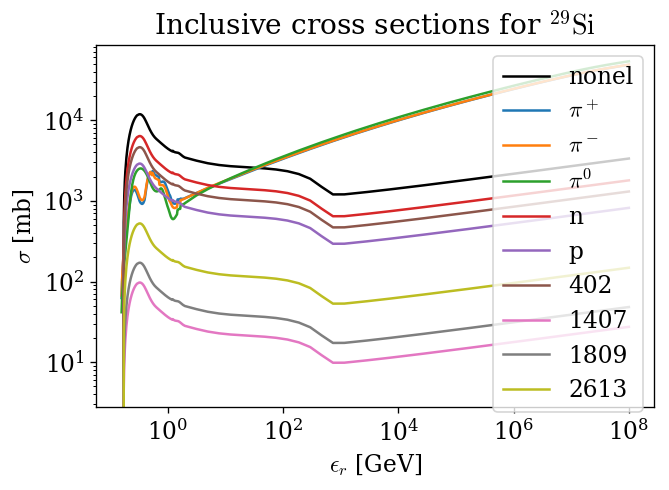

In [10]:
plt.semilogx(*em.cs_nonel(2914), c='k', label='nonel')
plt.loglog(*em.cs_incl(2914, 2), label=r'$\pi^+$')
plt.loglog(*em.cs_incl(2914, 3), label=r'$\pi^-$')
plt.loglog(*em.cs_incl(2914, 4), label=r'$\pi^0$')
plt.loglog(*em.cs_incl(2914, 100), label='n')
plt.loglog(*em.cs_incl(2914, 101), label='p')
plt.loglog(*em.cs_incl(2914, 201), label='402')
plt.loglog(*em.cs_incl(2914, 1407), label='1407')
plt.loglog(*em.cs_incl(2914, 1809), label='1809')
plt.loglog(*em.cs_incl(2914, 2613), label='2613')


plt.title(r'Inclusive cross sections for $\rm ^{29}Si$')
plt.xlabel(r'$\epsilon_r$ [GeV]')
plt.ylabel(r'$\sigma$ [mb]')
plt.legend()

... and the inclusive cross sections comparison in the RDM...

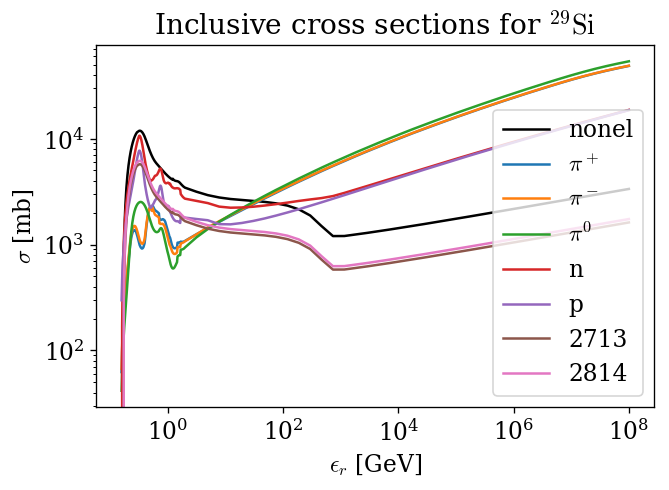

In [11]:
plt.semilogx(*rdm.cs_nonel(2914), c='k', label='nonel')
plt.loglog(*rdm.cs_incl(2914, 2), label=r'$\pi^+$')
plt.loglog(*rdm.cs_incl(2914, 3), label=r'$\pi^-$')
plt.loglog(*rdm.cs_incl(2914, 4), label=r'$\pi^0$')
plt.loglog(*rdm.cs_incl(2914, 100), label='n')
plt.loglog(*rdm.cs_incl(2914, 101), label='p')
plt.loglog(*rdm.cs_incl(2914, 2713), label='2713')
plt.loglog(*rdm.cs_incl(2914, 2814), label='2814')

plt.title(r'Inclusive cross sections for $\rm ^{29}Si$')
plt.xlabel(r'$\epsilon_r$ [GeV]')
plt.ylabel(r'$\sigma$ [mb]')
plt.legend()

# change p and n cross section on fill_multip

The products which are redistributed (pions and nucleons) have a differential inclusive cross section given by the method cs_incl_diff. The method returns the energy and the cross section which is a numpy array with shape ($n_x$, $n_y$) where $n_x$, $n_y$ are the number of $x$ bins and energy bins respectively. The redistribution is given in terms of fractions of the interacting particle $x$ in logarithmic scale, and the x bins can be accessed with the atribute xbins:

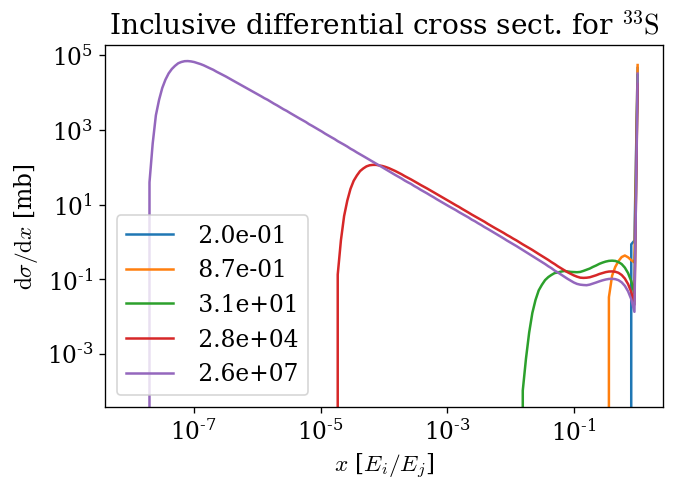

In [12]:
energy, cs_diff = em.cs_incl_diff(3316, 100)
xvalues = em.xcenters

for i in [10, 80, 125, 140, 155]:
    plt.loglog(xvalues, cs_diff[:, i], label=r' {:2.1e}'.format(energy[i]))

plt.title(r'Inclusive differential cross sect. for $\rm ^{33}S$')
plt.xlabel(r'$x$ [$E_i/E_j$]')
plt.ylabel(r'${\rmd} \sigma / {\rmd} x$ [mb]')
plt.legend()


Below are some atributes which contain indices to iterate over when extracting the cross sections. However, requesting a cross section which is not defined will not result in an error, the output will be an array with the expected dimensions filled with zeros.

In [13]:
print em.nonel_idcs[:9]
print em.incl_idcs[:9]
print em.incl_diff_idcs[:9]

[201, 202, 301, 302, 303, 401, 402, 403, 501]
[(201, 101), (201, 100), (202, 101), (202, 102), (202, 100), (301, 200), (301, 100), (301, 201), (301, 101)]
[(201, 2), (201, 3), (201, 4), (201, 100), (201, 101), (202, 2), (202, 3), (202, 4), (202, 100)]


(100.0, 3000.0)

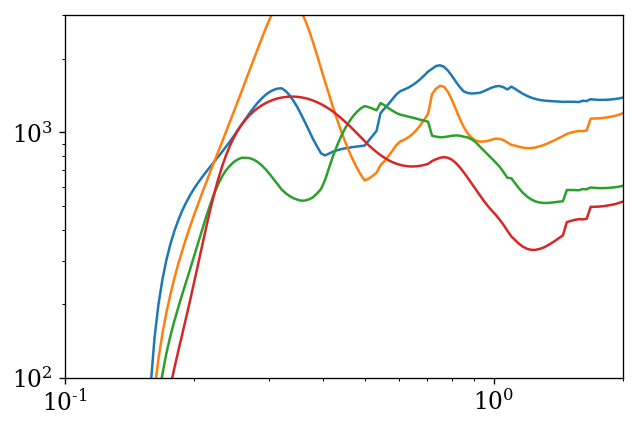

In [14]:
plt.loglog(*spm.cs_incl(1206, 2))
plt.loglog(*spm.cs_incl(1206, 4))

plt.loglog(*em.cs_incl(1206, 2))
plt.loglog(*em.cs_incl(1206, 4))


plt.xlim([.1, 2])
plt.ylim([1e2, 3e3])

(0.1, 2)

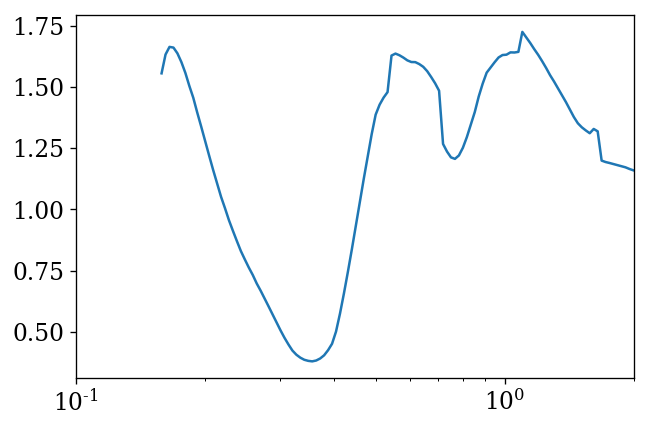

In [15]:
e, cs2 = spm.cs_incl(1206, 2)
e, cs4 = spm.cs_incl(1206, 4)
plt.semilogx(e, cs2/cs4)
# plt.loglog()

plt.xlim([.1, 2])

In [20]:
rdm.multiplicity[2914, 101]

rdm._incl_diff_tab[2914, 101]

0